In [50]:
# Importing Libraries
from matplotlib import cm  # color map
import math
import matplotlib.pyplot as plt #matplotlib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

## Question No. 1

## 1. LOAD THE DATA SET 

In [59]:
# reading csv file
csvfile = pd.read_csv(r"C:\Users\sonuk\OneDrive\Documents\iris.csv",header = None)  
df = csvfile.rename(columns = {0:'sepal_length' ,1:'sepal_width',2:'petal_length',3:'petal_width',4:'class'})
print(df)

     sepal_length  sepal_width  petal_length  petal_width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


## 2. NORMALIZATION OF DATA SET

In [60]:
feature1 = df['sepal_length']
feature2 = df['sepal_width']
feature3 = df['petal_length']
feature4 = df['petal_width']
a1 = max(feature1)
a2 = min(feature1)
b1 = max(feature2)
b2 = min(feature2)
c1 = max(feature3)
c2 = min(feature3)
d1 = max(feature4)
d2 = min(feature4)
df['sepal_length'] = (feature1-a2)/(a1-a2)
df['sepal_width']= (feature2-b2)/(b1-b2)
df['petal_length'] = (feature3-c2)/(c1-c2)
df['petal_width'] = (feature4-d2)/(d1-d2)
print("normalized dataframe : \n ",df)

normalized dataframe : 
       sepal_length  sepal_width  petal_length  petal_width           class
0        0.222222     0.625000      0.067797     0.041667     Iris-setosa
1        0.166667     0.416667      0.067797     0.041667     Iris-setosa
2        0.111111     0.500000      0.050847     0.041667     Iris-setosa
3        0.083333     0.458333      0.084746     0.041667     Iris-setosa
4        0.194444     0.666667      0.067797     0.041667     Iris-setosa
..            ...          ...           ...          ...             ...
145      0.666667     0.416667      0.711864     0.916667  Iris-virginica
146      0.555556     0.208333      0.677966     0.750000  Iris-virginica
147      0.611111     0.416667      0.711864     0.791667  Iris-virginica
148      0.527778     0.583333      0.745763     0.916667  Iris-virginica
149      0.444444     0.416667      0.694915     0.708333  Iris-virginica

[150 rows x 5 columns]


## Spliting dataset

In [61]:
y = df['class']
X = df[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)
data = pd.concat([X_train, y_train], axis = 1)
data_test = pd.concat([X_test, y_test], axis=1)
data.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)
print(" dataset of training set \n ",data)
print("dataset of test data \n ",data_test)

 dataset of training set 
       sepal_length  sepal_width  petal_length  petal_width            class
0        0.805556     0.500000      0.847458     0.708333   Iris-virginica
1        0.222222     0.208333      0.338983     0.416667  Iris-versicolor
2        0.500000     0.333333      0.627119     0.458333  Iris-versicolor
3        0.666667     0.541667      0.796610     1.000000   Iris-virginica
4        0.222222     0.708333      0.084746     0.125000      Iris-setosa
..            ...          ...           ...          ...              ...
115      0.444444     0.500000      0.644068     0.708333  Iris-versicolor
116      0.583333     0.333333      0.779661     0.875000   Iris-virginica
117      0.333333     0.916667      0.067797     0.041667      Iris-setosa
118      0.805556     0.666667      0.864407     1.000000   Iris-virginica
119      0.722222     0.458333      0.745763     0.833333   Iris-virginica

[120 rows x 5 columns]
dataset of test data 
      sepal_length  sepal_

## 3. Distance Metric

In [54]:
# defining euclidean distance
def eu_dis(ar1, ar2):
    val = 0
    for i in range(len(ar1)):
        val = val +(ar1[i]-ar2[i])**2
    final_ans = math.sqrt(val)
    return final_ans

## Normalization of test sample

In [55]:
# defining normalization of test sample
def norm(arr):
    arr[0] = (arr[0]-a2)/(a1-a2)
    arr[1] = (arr[1] - b2)/(b1-b2)
    arr[2] = (arr[2] - c2)/(c1-c2)
    arr[3] = (arr[3]-d2)/(d1-d2)
    return arr

##  4. Nearest Neighbours & Prediction using KNN  

In [56]:
def KNN(data, test_sample, k):
    dist = pd.DataFrame()   # making dataframe
    for i in range(len(data)):
        distance = eu_dis(np.array(data.iloc[i])[:4], test_sample)  # calculating euclidean distance
        dist = dist.append({'class': data.iloc[i][4], 'distance' : distance, 'weight': None},
                           ignore_index = True)  # adding two different column to dataframe
    dist = dist.sort_values(by='distance', ascending=True)  # sorting them
    dist.loc[dist['distance']==0.0, "weight"] = 1/dist['distance'].unique()[1]
    dist.loc[dist['distance']!=0.0, "weight"] = 1/dist['distance']
    dist["weight"] = dist["weight"].astype(float)
    nn = dist.head(k)
    nn = nn.groupby(["class"]).sum().reset_index()  # making group of class acc to sum 
    nn = nn[nn["weight"]==nn["weight"].max()]["class"].tolist()
    return nn

## 5. Test

In [57]:

# testing for given test records
test1 = KNN(data, norm([5.1, 2.5, 3.2, 4.3]), 5)
print("test1 belongs to class : ", test1)
test2 = KNN(data, norm([4.9, 3, 1.4, 0.2]), 5)
print("test2 belongs to class : ", test2)
test3 = KNN(data,norm([6, 3, 4.8, 1.8]), 5)
print("test3 belongs to class :",test3)

test1 belongs to class :  ['Iris-virginica']
test2 belongs to class :  ['Iris-setosa']
test3 belongs to class : ['Iris-virginica']


## 6. Accuracy

In [58]:
def accuracy(data, data_test, k):
    data_test["pred"] = None
    for i in range(len(data_test)):
       data_test.loc[i, "pred"] = KNN(data, np.array(data_test.iloc[i])[:4], 8)
    accu = accuracy_score(data_test["class"], data_test["pred"]) # calculating accuracy for test data set
    cfm = confusion_matrix(data_test["class"], data_test["pred"])  # making confusion matrix
    clr = classification_report(data_test["class"], data_test["pred"])

    return (accu,cfm,clr)
(accuracy, confusion_matrix, classification_report) = accuracy(data,data_test,8)
print(accuracy)
print(confusion_matrix)
print(classification_report)

0.9333333333333333
[[ 9  0  0]
 [ 0 10  2]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.94      0.94        30
   weighted avg       0.95      0.93      0.93        30



In [ ]:
# now maximum accuracy occured at k = 8 by varying value of k 
#  the prediction accuracy of each class is maximum at k=9 
# other than  Hyperparameter tuning method, the other ways of choosing the optimal values of k is by using:
#  1.Schwarz criterion
#  2.Cross-validation method
#  3.Elbow method

## Question No. 2

## 1. Load Dataset

In [42]:
csvfile2 = pd.read_csv(r"C:\Users\sonuk\OneDrive\Documents\dataset.csv",header = None, skiprows = 1) 
df = csvfile2.drop([0], axis = 1)
df = df.rename(columns = {1:'feature1', 2: 'feature2'})

## 2. Visualization 

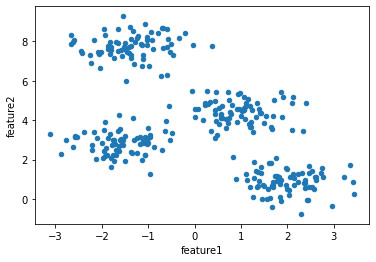

In [43]:
df.plot(kind ="scatter", x ='feature1', y ='feature2') 
plt.show()

## 3. K Means Algorithm 

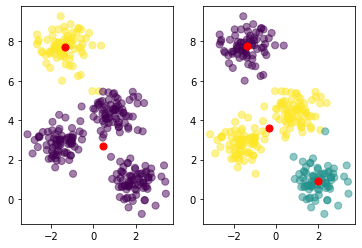

In [44]:
# plotting clustring for different values of k from 2 to 10

# taking centroids for k = 2
kmeans = KMeans(n_clusters=2).fit(df)
centroids = kmeans.cluster_centers_   # chossing centroids using kmeans algo
plt.subplot(1,2, 1)
plt.scatter(df['feature1'], df['feature2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

# taking centroids for k = 3
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
plt.subplot(1,2, 2)
plt.scatter(df['feature1'], df['feature2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

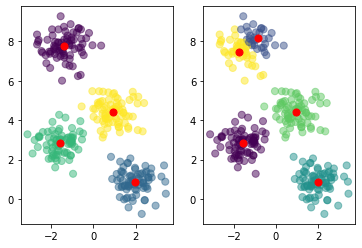

In [45]:
#taking centroids for k = 4
kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
plt.subplot(1,2,1)
plt.scatter(df['feature1'], df['feature2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

# taking centroids for k = 5
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
plt.subplot(1,2,2)
plt.scatter(df['feature1'], df['feature2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


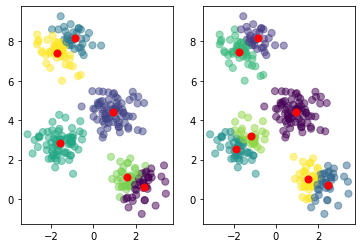

In [46]:

# taking centroids for k = 6
kmeans = KMeans(n_clusters=6).fit(df)
centroids = kmeans.cluster_centers_
plt.subplot(1,2, 1)
plt.scatter(df['feature1'], df['feature2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

# taking centroids for k = 7
kmeans = KMeans(n_clusters=7).fit(df)
centroids = kmeans.cluster_centers_
plt.subplot(1,2, 2)
plt.scatter(df['feature1'], df['feature2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


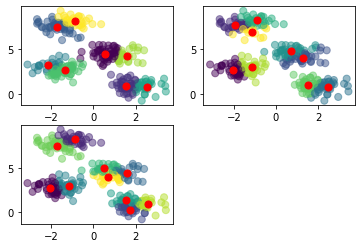

In [47]:
# taking centroids for k = 8
kmeans = KMeans(n_clusters=8).fit(df)
centroids = kmeans.cluster_centers_
plt.subplot(2,2, 1)
plt.scatter(df['feature1'], df['feature2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
#plt.show()

# taking centroids for k = 9
kmeans = KMeans(n_clusters=9).fit(df)
centroids = kmeans.cluster_centers_
plt.subplot(2,2,2)
plt.scatter(df['feature1'], df['feature2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
#plt.show()

# taking centroids for k = 10
kmeans = KMeans(n_clusters=10).fit(df)
centroids = kmeans.cluster_centers_
plt.subplot(2,2,3)
#title('cluster for k = 10')
plt.scatter(df['feature1'], df['feature2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [ ]:
##  by visualizing different clusters k=4 is the most appropriate for this dataset 
#beacuse when we using k=4 then it give better visualization for clustreing